#  Analyse des ventes de la librairie en ligne

**Projet 9 - Analysez les ventes d'une librairie avec Python**

---

## Objectifs de l'analyse

1. **Analyses du chiffre d'affaires** :
   - Évolution temporelle avec moyennes mobiles
   - Chiffre d'affaires par catégorie
   - Nombre de clients et transactions
   - Tops et flops produits

2. **Analyses des clients** :
   - Identification des clients BtoB
   - Courbe de Lorenz
   - Profils clients

---

## 1. Import des bibliothèques

In [1]:
# Manipulation de données
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Dates
from datetime import datetime

# Statistiques
from scipy import stats

# Configuration des graphiques
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

# Affichage complet des dataframes
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Ignorer les warnings
import warnings
warnings.filterwarnings('ignore')

print("Bibliothèques importées avec succès")

Bibliothèques importées avec succès


## 2. Chargement et nettoyage des données

### 2.1 Chargement des fichiers bruts

In [2]:
# Chargement du fichier clients (avec séparateur point-virgule)
df_customers = pd.read_csv('customers.csv', sep=';')
print(" Fichier customers.csv chargé")
print(f"   - Nombre de clients : {len(df_customers)}")
print(f"   - Colonnes : {df_customers.columns.tolist()}")
print("\nAperçu :")
df_customers.head()

 Fichier customers.csv chargé
   - Nombre de clients : 8621
   - Colonnes : ['client_id', 'sex', 'birth']

Aperçu :


,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [3]:
# Chargement du fichier produits (avec séparateur point-virgule)
df_products = pd.read_csv('products.csv', sep=';')
print(" Fichier products.csv chargé")
print(f"   - Nombre de produits : {len(df_products)}")
print(f"   - Colonnes : {df_products.columns.tolist()}")
print("\nAperçu :")
df_products.head()

 Fichier products.csv chargé
   - Nombre de produits : 3286
   - Colonnes : ['id_prod', 'price', 'categ']

Aperçu :


,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [4]:
# Chargement du fichier transactions (format Excel avec problème de structure)
# Le fichier a toutes les données dans une seule colonne, séparées par ";"
print("Correction du format du fichier Transactions.xlsx...")

# Lecture du fichier Excel brut
df_trans_raw = pd.read_excel('Transactions.xlsx', header=None)
print(f"   - Lignes chargées : {len(df_trans_raw)}")
print(f"   - Format initial : {df_trans_raw.columns.tolist()}")

# Extraction de la ligne d'en-tête (première ligne)
header_line = df_trans_raw.iloc[0, 0]
print(f"   - En-tête détecté : {header_line}")

# Séparation des colonnes
df_transactions = df_trans_raw[0].str.split(';', expand=True)

# Attribution des noms de colonnes depuis la première ligne
df_transactions.columns = df_transactions.iloc[0]

# Suppression de la ligne d'en-tête et réinitialisation de l'index
df_transactions = df_transactions.iloc[1:].reset_index(drop=True)

print("\n Fichier Transactions.xlsx corrigé")
print(f"   - Nombre de transactions : {len(df_transactions)}")
print(f"   - Colonnes : {df_transactions.columns.tolist()}")
print("\nAperçu :")
df_transactions.head()

Correction du format du fichier Transactions.xlsx...
   - Lignes chargées : 1048576
   - Format initial : [0]
   - En-tête détecté : id_prod;date;session_id;client_id

 Fichier Transactions.xlsx corrigé
   - Nombre de transactions : 1048575
   - Colonnes : ['id_prod', 'date', 'session_id', 'client_id']

Aperçu :


,id_prod,date,session_id,client_id
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033


### 2.2 Nettoyage et conversion des types de données

In [5]:
# Conversion de la colonne date en datetime
print(" Conversion de la colonne date...")
df_transactions['date'] = pd.to_datetime(df_transactions['date'])

# Vérification des types de données
print("\nTypes de données après conversion :")
print(df_transactions.dtypes)

# Statistiques de base sur les dates
print("\n Période couverte :")
print(f"   - Date minimale : {df_transactions['date'].min()}")
print(f"   - Date maximale : {df_transactions['date'].max()}")
print(f"   - Durée : {(df_transactions['date'].max() - df_transactions['date'].min()).days} jours")

 Conversion de la colonne date...

Types de données après conversion :
0
id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
dtype: object

 Période couverte :
   - Date minimale : 2021-03-01 00:01:07.843138
   - Date maximale : 2023-02-28 23:58:30.792755
   - Durée : 729 jours


In [6]:
# Vérification des valeurs manquantes dans tous les datasets
print(" Vérification des valeurs manquantes :")
print("\nCustomers :")
print(df_customers.isnull().sum())

print("\nProducts :")
print(df_products.isnull().sum())

print("\nTransactions :")
print(df_transactions.isnull().sum())

 Vérification des valeurs manquantes :

Customers :
client_id    0
sex          0
birth        0
dtype: int64

Products :
id_prod    0
price      0
categ      0
dtype: int64

Transactions :
0
id_prod            0
date          361041
session_id         0
client_id          0
dtype: int64


In [7]:
# Calcul de l'âge des clients (année actuelle - année de naissance)
annee_actuelle = 2024
df_customers['age'] = annee_actuelle - df_customers['birth']

print("Âge des clients calculé")
print("\nStatistiques d'âge :")
print(df_customers['age'].describe())

df_customers.head()

Âge des clients calculé

Statistiques d'âge :
count    8621.000000
mean       45.724394
std        16.917958
min        20.000000
25%        32.000000
50%        45.000000
75%        58.000000
max        95.000000
Name: age, dtype: float64


,client_id,sex,birth,age
0,c_4410,f,1967,57
1,c_7839,f,1975,49
2,c_1699,f,1984,40
3,c_5961,f,1962,62
4,c_5320,m,1943,81


### 2.3 Création du dataset complet avec fusion

In [8]:
# Fusion des transactions avec les produits
df_complete = df_transactions.merge(df_products, on='id_prod', how='left')
print(" Fusion transactions + produits")

# Fusion avec les clients
df_complete = df_complete.merge(df_customers, on='client_id', how='left')
print("Fusion + clients")

# Calcul du chiffre d'affaires par transaction
df_complete['ca'] = df_complete['price']

print(f"\n Dataset complet créé : {len(df_complete)} lignes")
print(f"   Colonnes : {df_complete.columns.tolist()}")

df_complete.head(10)

 Fusion transactions + produits
Fusion + clients

 Dataset complet créé : 1048575 lignes
   Colonnes : ['id_prod', 'date', 'session_id', 'client_id', 'price', 'categ', 'sex', 'birth', 'age', 'ca']


,id_prod,date,session_id,client_id,price,categ,sex,birth,age,ca
0,0_1259,2021-03-01 00:01:07.843138,s_1,c_329,11.99,0.0,f,1967.0,57.0,11.99
1,0_1390,2021-03-01 00:02:26.047414,s_2,c_664,19.37,0.0,m,1960.0,64.0,19.37
2,0_1352,2021-03-01 00:02:38.311413,s_3,c_580,4.50,0.0,m,1988.0,36.0,4.50
3,0_1458,2021-03-01 00:04:54.559692,s_4,c_7912,6.55,0.0,f,1989.0,35.0,6.55
4,0_1358,2021-03-01 00:05:18.801198,s_5,c_2033,16.49,0.0,f,1956.0,68.0,16.49
5,0_1073,2021-03-01 00:05:44.999018,s_6,c_4908,13.99,0.0,f,1981.0,43.0,13.99
6,0_1304,2021-03-01 00:07:04.371179,s_7,c_1609,5.86,0.0,m,1980.0,44.0,5.86
7,0_279,2021-03-01 00:07:48.507530,s_6,c_4908,16.99,0.0,f,1981.0,43.0,16.99
8,1_445,2021-03-01 00:09:11.523122,s_8,c_7991,23.99,1.0,m,1968.0,56.0,23.99
9,1_556,2021-03-01 00:10:20.265265,s_9,c_6171,24.47,1.0,m,1983.0,41.0,24.47


In [42]:
#supprimer les valeurs manquantes
df_complete.dropna(axis=1, how='all', inplace=True)
print(" Colonnes vides supprimées")
# Vérification de la qualité de la fusion
print(" Vérification de la fusion :")
print(f"\nValeurs manquantes après fusion :")
print(df_complete.isnull().sum())

print(f"\nInformations du dataset complet :")
df_complete.info()

 Colonnes vides supprimées
 Vérification de la fusion :

Valeurs manquantes après fusion :
id_prod       0
date          0
session_id    0
client_id     0
price         0
categ         0
sex           0
birth         0
age           0
ca            0
est_btob      0
semaine       0
mois          0
dtype: int64

Informations du dataset complet :
<class 'pandas.core.frame.DataFrame'>
Index: 687534 entries, 0 to 687533
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     687534 non-null  object        
 1   date        687534 non-null  datetime64[ns]
 2   session_id  687534 non-null  object        
 3   client_id   687534 non-null  object        
 4   price       687534 non-null  float64       
 5   categ       687534 non-null  float64       
 6   sex         687534 non-null  object        
 7   birth       687534 non-null  float64       
 8   age         687534 non-null  float64       
 9   ca 

## 3. Identification des clients BtoB (atypiques)

Les clients BtoB se caractérisent généralement par :
- Un volume d'achats très élevé
- Une fréquence d'achat importante
- Un montant total de dépenses exceptionnellement élevé

In [10]:
# Agrégation par client pour identifier les profils
client_stats = df_complete.groupby('client_id').agg({
    'ca': ['sum', 'count', 'mean'],
    'session_id': 'nunique',
    'date': ['min', 'max']
}).reset_index()

# Renommer les colonnes pour plus de clarté
client_stats.columns = ['client_id', 'ca_total', 'nb_achats', 'panier_moyen', 
                        'nb_sessions', 'premiere_transaction', 'derniere_transaction']

# Trier par CA total décroissant
client_stats = client_stats.sort_values('ca_total', ascending=False).reset_index(drop=True)

print("Statistiques par client :")
print(client_stats.head(20))

Statistiques par client :
   client_id   ca_total  nb_achats  panier_moyen  nb_sessions  \
0     c_1609  326039.89      25586     12.742902        10997   
1     c_4958  290227.03       5222     55.577754         3851   
2     c_6714  153918.60       9199     16.732101         2620   
3     c_3454  114110.57       6793     16.798259         5571   
4     c_1570    5285.82        370     14.286000          159   
5     c_3263    5276.87        403     13.093970          143   
6     c_2140    5260.18        405     12.988099          147   
7     c_2899    5214.05        105     49.657619           69   
8     c_7319    5155.77        371     13.896954          145   
9     c_7959    5135.75        372     13.805780          148   
10    c_1422    5131.36        379     13.539208          149   
11    c_7421    5097.18        381     13.378425          156   
12    c_8026    5082.58        376     13.517500          145   
13    c_2505    5059.35        366     13.823361          150   

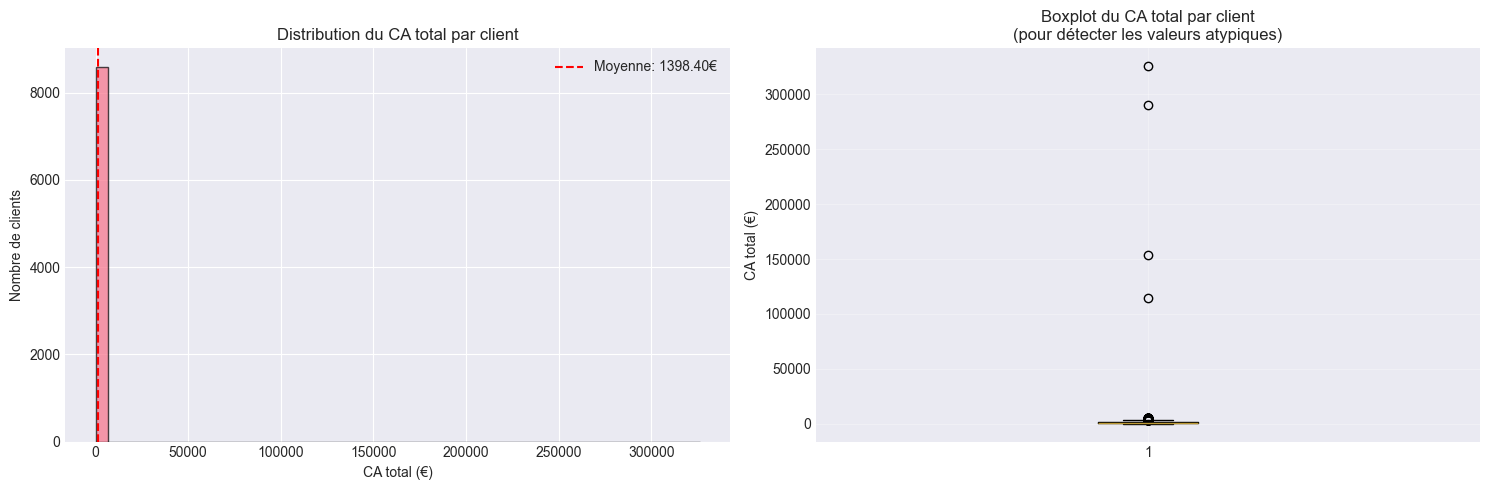


 Statistiques descriptives du CA total :
count      8601.000000
mean       1398.402872
std        5202.491040
min           0.000000
25%         562.670000
50%        1045.690000
75%        1797.350000
max      326039.890000
Name: ca_total, dtype: float64


In [44]:
# Visualisation de la distribution du CA total par client
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histogramme du CA total
axes[0].hist(client_stats['ca_total'], bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('CA total (€)')
axes[0].set_ylabel('Nombre de clients')
axes[0].set_title('Distribution du CA total par client')
axes[0].axvline(client_stats['ca_total'].mean(), color='red', linestyle='--', 
                label=f'Moyenne: {client_stats["ca_total"].mean():.2f}€')
axes[0].legend()

# Boxplot pour détecter les outliers
axes[1].boxplot(client_stats['ca_total'], vert=True)
axes[1].set_ylabel('CA total (€)')
axes[1].set_title('Boxplot du CA total par client\n(pour détecter les valeurs atypiques)')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n Statistiques descriptives du CA total :")
print(client_stats['ca_total'].describe())

In [12]:
# Identification des clients BtoB avec la méthode IQR (Interquartile Range)
Q1 = client_stats['ca_total'].quantile(0.25)
Q3 = client_stats['ca_total'].quantile(0.75)
IQR = Q3 - Q1

# Seuil pour les outliers extrêmes (3 * IQR au lieu de 1.5)
seuil_extreme = Q3 + 3 * IQR

print(f" Analyse des valeurs atypiques (méthode IQR) :")
print(f"   - Q1 (25%) : {Q1:.2f}€")
print(f"   - Q3 (75%) : {Q3:.2f}€")
print(f"   - IQR : {IQR:.2f}€")
print(f"   - Seuil outliers extrêmes (Q3 + 3*IQR) : {seuil_extreme:.2f}€")

# Identification des clients BtoB (outliers extrêmes)
clients_btob = client_stats[client_stats['ca_total'] > seuil_extreme].copy()

print(f"\n Clients BtoB identifiés : {len(clients_btob)}")
print("\nDétails des clients BtoB :")
print(clients_btob)

 Analyse des valeurs atypiques (méthode IQR) :
   - Q1 (25%) : 562.67€
   - Q3 (75%) : 1797.35€
   - IQR : 1234.68€
   - Seuil outliers extrêmes (Q3 + 3*IQR) : 5501.39€

 Clients BtoB identifiés : 4

Détails des clients BtoB :
  client_id   ca_total  nb_achats  panier_moyen  nb_sessions  \
0    c_1609  326039.89      25586     12.742902        10997   
1    c_4958  290227.03       5222     55.577754         3851   
2    c_6714  153918.60       9199     16.732101         2620   
3    c_3454  114110.57       6793     16.798259         5571   

        premiere_transaction       derniere_transaction  
0 2021-03-01 00:07:04.371179 2023-02-28 22:29:54.677919  
1 2021-03-01 04:54:48.643575 2023-02-28 23:08:40.035146  
2 2021-03-01 06:44:06.269773 2023-02-28 23:10:49.235323  
3 2021-03-01 01:08:49.803921 2023-02-28 23:16:12.006088  


In [13]:
# Si on n'a pas exactement 4 clients BtoB, ajustons la méthode
if len(clients_btob) != 4:
    print("\n Ajustement : sélection des 4 clients avec le CA le plus élevé")
    clients_btob = client_stats.nlargest(4, 'ca_total')
    print("\n Les 4 clients BtoB identifiés :")
    print(clients_btob)

# Liste des IDs des clients BtoB
btob_ids = clients_btob['client_id'].tolist()
print(f"\n IDs des clients BtoB : {btob_ids}")

# Marquer les clients BtoB dans le dataset
df_complete['est_btob'] = df_complete['client_id'].isin(btob_ids)
client_stats['est_btob'] = client_stats['client_id'].isin(btob_ids)

print(f"\n {df_complete['est_btob'].sum()} transactions marquées comme BtoB")


 IDs des clients BtoB : ['c_1609', 'c_4958', 'c_6714', 'c_3454']

 46800 transactions marquées comme BtoB


In [14]:
# Comparaison clients BtoB vs BtoC
print("Comparaison BtoB vs BtoC :")
print("\nClients BtoB :")
print(clients_btob[['client_id', 'ca_total', 'nb_achats', 'panier_moyen', 'nb_sessions']])

print("\nMoyenne des clients BtoC (non BtoB) :")
clients_btoc = client_stats[~client_stats['est_btob']]
print(f"   - CA moyen : {clients_btoc['ca_total'].mean():.2f}€")
print(f"   - Nombre achats moyen : {clients_btoc['nb_achats'].mean():.2f}")
print(f"   - Panier moyen : {clients_btoc['panier_moyen'].mean():.2f}€")
print(f"   - Sessions moyennes : {clients_btoc['nb_sessions'].mean():.2f}")

print("\nMoyenne des clients BtoB :")
print(f"   - CA moyen : {clients_btob['ca_total'].mean():.2f}€")
print(f"   - Nombre achats moyen : {clients_btob['nb_achats'].mean():.2f}")
print(f"   - Panier moyen : {clients_btob['panier_moyen'].mean():.2f}€")
print(f"   - Sessions moyennes : {clients_btob['nb_sessions'].mean():.2f}")

Comparaison BtoB vs BtoC :

Clients BtoB :
  client_id   ca_total  nb_achats  panier_moyen  nb_sessions
0    c_1609  326039.89      25586     12.742902        10997
1    c_4958  290227.03       5222     55.577754         3851
2    c_6714  153918.60       9199     16.732101         2620
3    c_3454  114110.57       6793     16.798259         5571

Moyenne des clients BtoC (non BtoB) :
   - CA moyen : 1296.19€
   - Nombre achats moyen : 74.53
   - Panier moyen : 21.93€
   - Sessions moyennes : 37.51

Moyenne des clients BtoB :
   - CA moyen : 221074.02€
   - Nombre achats moyen : 11700.00
   - Panier moyen : 25.46€
   - Sessions moyennes : 5759.75


## 4. Analyses du Chiffre d'Affaires

### 4.1 Évolution temporelle du CA avec moyennes mobiles

In [15]:
# Calcul du CA journalier
ca_journalier = df_complete.groupby(df_complete['date'].dt.date)['ca'].sum().reset_index()
ca_journalier.columns = ['date', 'ca']
ca_journalier['date'] = pd.to_datetime(ca_journalier['date'])

# Calcul des moyennes mobiles
ca_journalier['MM_7j'] = ca_journalier['ca'].rolling(window=7, center=True).mean()
ca_journalier['MM_30j'] = ca_journalier['ca'].rolling(window=30, center=True).mean()

print(" CA journalier calculé avec moyennes mobiles sur 7 et 30 jours")
ca_journalier.head(10)

 CA journalier calculé avec moyennes mobiles sur 7 et 30 jours


,date,ca,MM_7j,MM_30j
0,2021-03-01,16565.22,NaN,NaN
1,2021-03-02,15486.45,NaN,NaN
2,2021-03-03,15198.69,NaN,NaN
3,2021-03-04,15196.07,15780.468571,NaN
4,2021-03-05,17471.37,15653.941429,NaN
5,2021-03-06,15785.28,15685.950000,NaN
6,2021-03-07,14760.20,15728.547143,NaN
7,2021-03-08,15679.53,15672.128571,NaN
8,2021-03-09,15710.51,15240.301429,NaN
9,2021-03-10,15496.87,15031.667143,NaN


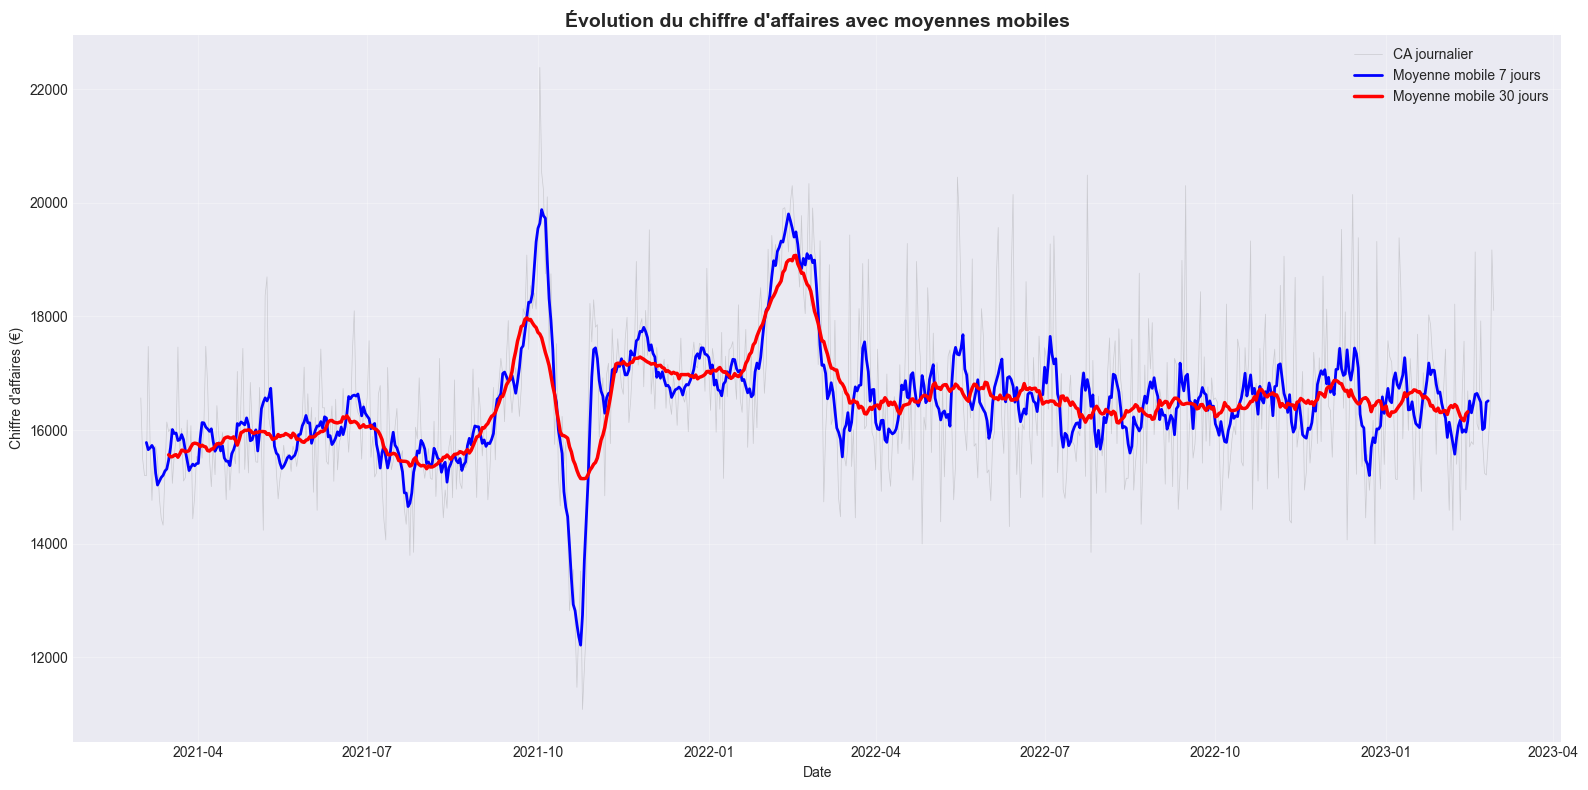


 Statistiques du CA journalier :
   - CA journalier moyen : 16476.25€
   - CA journalier médian : 16304.72€
   - CA journalier min : 11080.75€
   - CA journalier max : 22382.43€


In [16]:
# Visualisation de l'évolution du CA avec moyennes mobiles
plt.figure(figsize=(16, 8))

# CA journalier
plt.plot(ca_journalier['date'], ca_journalier['ca'], 
         alpha=0.3, color='gray', label='CA journalier', linewidth=0.5)

# Moyenne mobile 7 jours
plt.plot(ca_journalier['date'], ca_journalier['MM_7j'], 
         color='blue', label='Moyenne mobile 7 jours', linewidth=2)

# Moyenne mobile 30 jours
plt.plot(ca_journalier['date'], ca_journalier['MM_30j'], 
         color='red', label='Moyenne mobile 30 jours', linewidth=2.5)

plt.xlabel('Date')
plt.ylabel('Chiffre d\'affaires (€)')
plt.title('Évolution du chiffre d\'affaires avec moyennes mobiles', fontsize=14, fontweight='bold')
plt.legend(loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print(f"\n Statistiques du CA journalier :")
print(f"   - CA journalier moyen : {ca_journalier['ca'].mean():.2f}€")
print(f"   - CA journalier médian : {ca_journalier['ca'].median():.2f}€")
print(f"   - CA journalier min : {ca_journalier['ca'].min():.2f}€")
print(f"   - CA journalier max : {ca_journalier['ca'].max():.2f}€")

### 4.2 CA par période (semaine, mois)

In [17]:
# CA par semaine
df_complete['semaine'] = df_complete['date'].dt.to_period('W')
ca_hebdo = df_complete.groupby('semaine')['ca'].sum().reset_index()
ca_hebdo['semaine'] = ca_hebdo['semaine'].astype(str)

# CA par mois
df_complete['mois'] = df_complete['date'].dt.to_period('M')
ca_mensuel = df_complete.groupby('mois')['ca'].sum().reset_index()
ca_mensuel['mois'] = ca_mensuel['mois'].astype(str)

print(" CA hebdomadaire et mensuel calculés")
print(f"\n Statistiques du CA hebdomadaire :")
print(f"   - CA hebdomadaire moyen : {ca_hebdo['ca'].mean():.2f}€")
print(f"   - CA hebdomadaire médian : {ca_hebdo['ca'].median():.2f}€")
print(f"   - CA hebdomadaire min : {ca_hebdo['ca'].min():.2f}€")
print(f"   - CA hebdomadaire max : {ca_hebdo['ca'].max():.2f}€")

print(f"\n Statistiques du CA mensuel :")
print(f"   - CA mensuel moyen : {ca_mensuel['ca'].mean():.2f}€")
print(f"   - CA mensuel médian : {ca_mensuel['ca'].median():.2f}€")
print(f"   - CA mensuel min : {ca_mensuel['ca'].min():.2f}€")
print(f"   - CA mensuel max : {ca_mensuel['ca'].max():.2f}€")

 CA hebdomadaire et mensuel calculés

 Statistiques du CA hebdomadaire :
   - CA hebdomadaire moyen : 114549.17€
   - CA hebdomadaire médian : 114796.34€
   - CA hebdomadaire min : 37275.96€
   - CA hebdomadaire max : 136415.20€

 Statistiques du CA mensuel :
   - CA mensuel moyen : 501152.63€
   - CA mensuel médian : 501566.10€
   - CA mensuel min : 456679.76€
   - CA mensuel max : 535571.50€


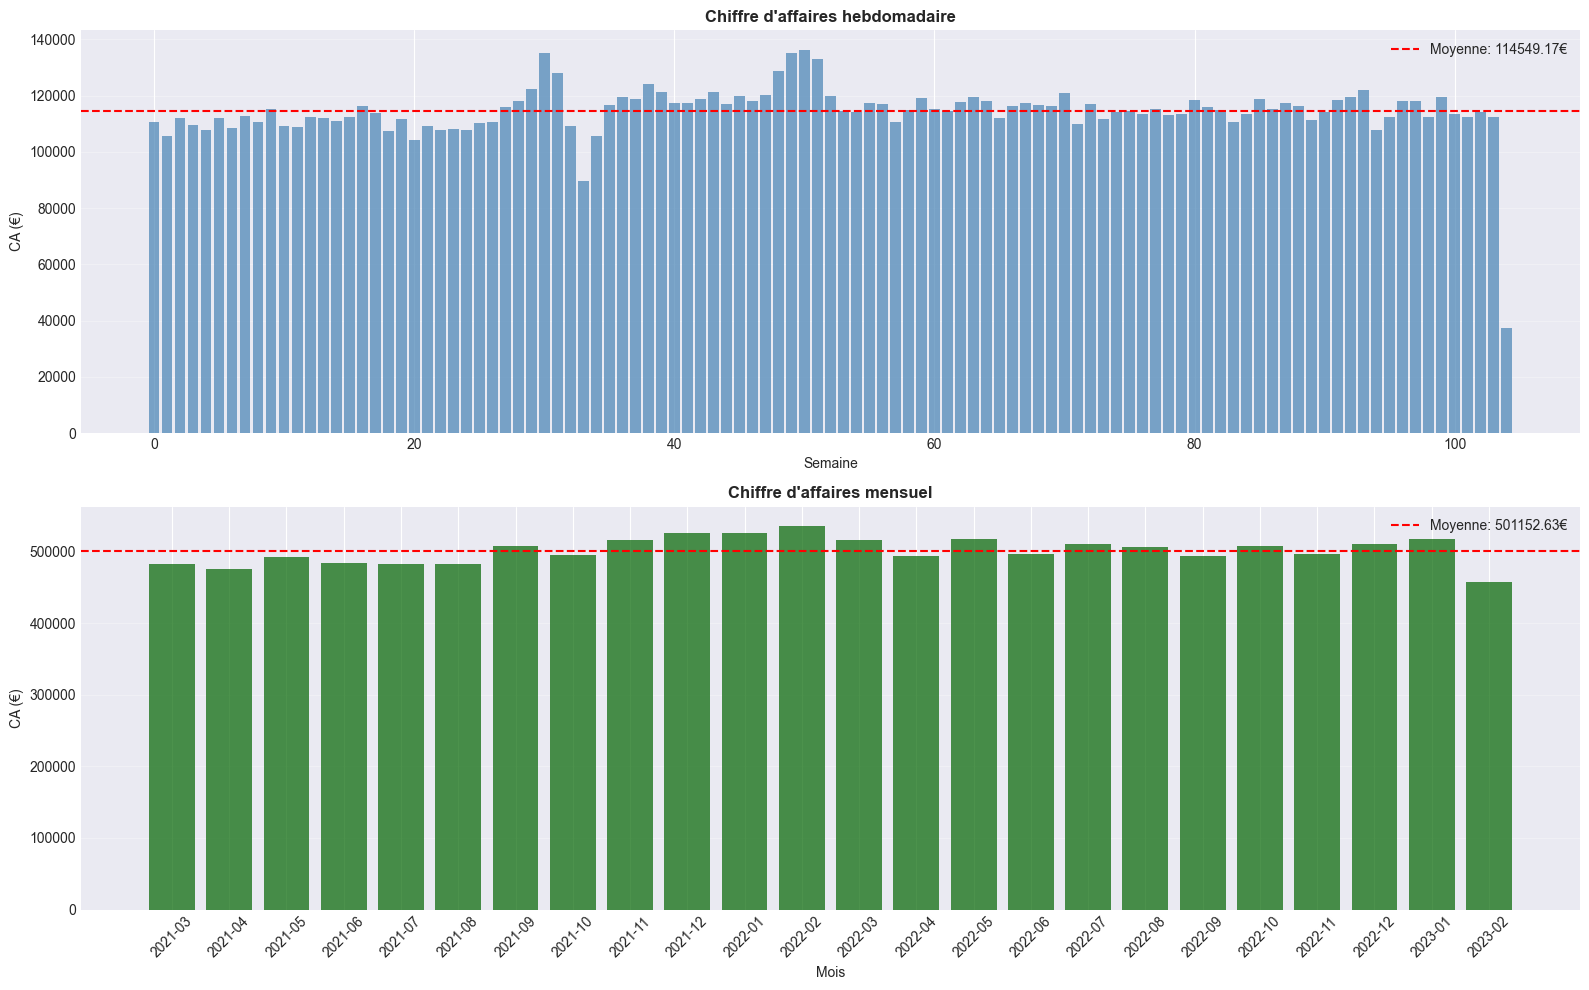

In [18]:
# Visualisation du CA mensuel
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# CA hebdomadaire
axes[0].bar(range(len(ca_hebdo)), ca_hebdo['ca'], color='steelblue', alpha=0.7)
axes[0].set_xlabel('Semaine')
axes[0].set_ylabel('CA (€)')
axes[0].set_title('Chiffre d\'affaires hebdomadaire', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].axhline(ca_hebdo['ca'].mean(), color='red', linestyle='--', 
                label=f'Moyenne: {ca_hebdo["ca"].mean():.2f}€')
axes[0].legend()

# CA mensuel
axes[1].bar(ca_mensuel['mois'], ca_mensuel['ca'], color='darkgreen', alpha=0.7)
axes[1].set_xlabel('Mois')
axes[1].set_ylabel('CA (€)')
axes[1].set_title('Chiffre d\'affaires mensuel', fontsize=12, fontweight='bold')
axes[1].tick_params(axis='x', rotation=45)
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].axhline(ca_mensuel['ca'].mean(), color='red', linestyle='--', 
                label=f'Moyenne: {ca_mensuel["ca"].mean():.2f}€')
axes[1].legend()

plt.tight_layout()
plt.show()

### 4.3 CA par catégorie de produits

In [19]:
# CA par catégorie
ca_par_categorie = df_complete.groupby('categ').agg({
    'ca': 'sum',
    'id_prod': 'count'
}).reset_index()
ca_par_categorie.columns = ['categorie', 'ca_total', 'nb_ventes']
ca_par_categorie = ca_par_categorie.sort_values('ca_total', ascending=False)

# Calcul du pourcentage du CA
ca_par_categorie['pourcentage_ca'] = (ca_par_categorie['ca_total'] / 
                                       ca_par_categorie['ca_total'].sum() * 100)

print(" CA par catégorie de produits :")
print(ca_par_categorie)

print(f"\n CA total toutes catégories : {ca_par_categorie['ca_total'].sum():.2f}€")

 CA par catégorie de produits :
   categorie    ca_total  nb_ventes  pourcentage_ca
1        1.0  4827657.11     235592       40.137948
0        0.0  4419730.97     415459       36.746382
2        2.0  2780275.02      36483       23.115671

 CA total toutes catégories : 12027663.10€


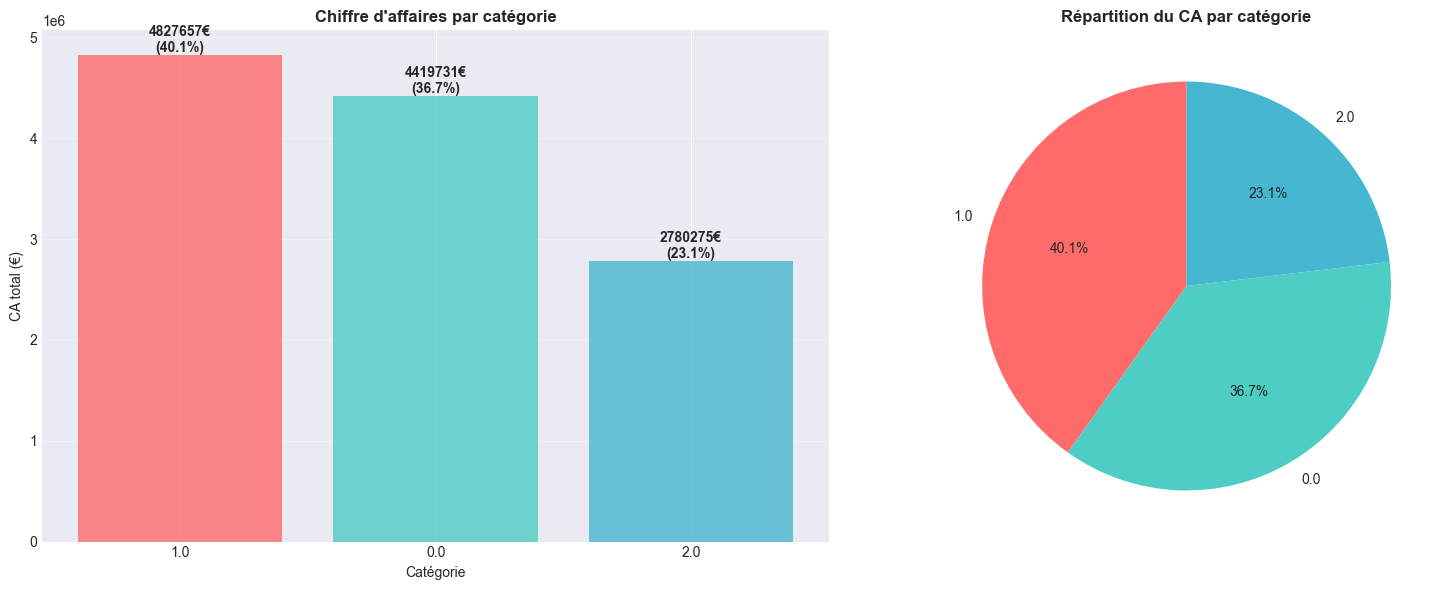

In [20]:
# Visualisation du CA par catégorie
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Diagramme en barres
axes[0].bar(ca_par_categorie['categorie'].astype(str), ca_par_categorie['ca_total'], 
            color=['#FF6B6B', '#4ECDC4', '#45B7D1'], alpha=0.8)
axes[0].set_xlabel('Catégorie')
axes[0].set_ylabel('CA total (€)')
axes[0].set_title('Chiffre d\'affaires par catégorie', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Ajout des valeurs sur les barres
for i, v in enumerate(ca_par_categorie['ca_total']):
    axes[0].text(i, v, f'{v:.0f}€\n({ca_par_categorie.iloc[i]["pourcentage_ca"]:.1f}%)', 
                 ha='center', va='bottom', fontweight='bold')

# Diagramme circulaire
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1']
axes[1].pie(ca_par_categorie['ca_total'], labels=ca_par_categorie['categorie'].astype(str), 
            autopct='%1.1f%%', colors=colors, startangle=90)
axes[1].set_title('Répartition du CA par catégorie', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

### 4.4 Nombre de clients par mois

In [21]:
# Nombre de clients uniques par mois
clients_par_mois = df_complete.groupby('mois')['client_id'].nunique().reset_index()
clients_par_mois.columns = ['mois', 'nb_clients']

print("Nombre de clients par mois :")
print(clients_par_mois)

print(f"\n Nombre moyen de clients par mois : {clients_par_mois['nb_clients'].mean():.0f}")

Nombre de clients par mois :
       mois  nb_clients
0   2021-03        5676
1   2021-04        5674
2   2021-05        5644
3   2021-06        5659
4   2021-07        5672
5   2021-08        5642
6   2021-09        5693
7   2021-10        6190
8   2021-11        5875
9   2021-12        5867
10  2022-01        5809
11  2022-02        5729
12  2022-03        5835
13  2022-04        5695
14  2022-05        5843
15  2022-06        5717
16  2022-07        5778
17  2022-08        5805
18  2022-09        5738
19  2022-10        5755
20  2022-11        5749
21  2022-12        5765
22  2023-01        5828
23  2023-02        5587

 Nombre moyen de clients par mois : 5759


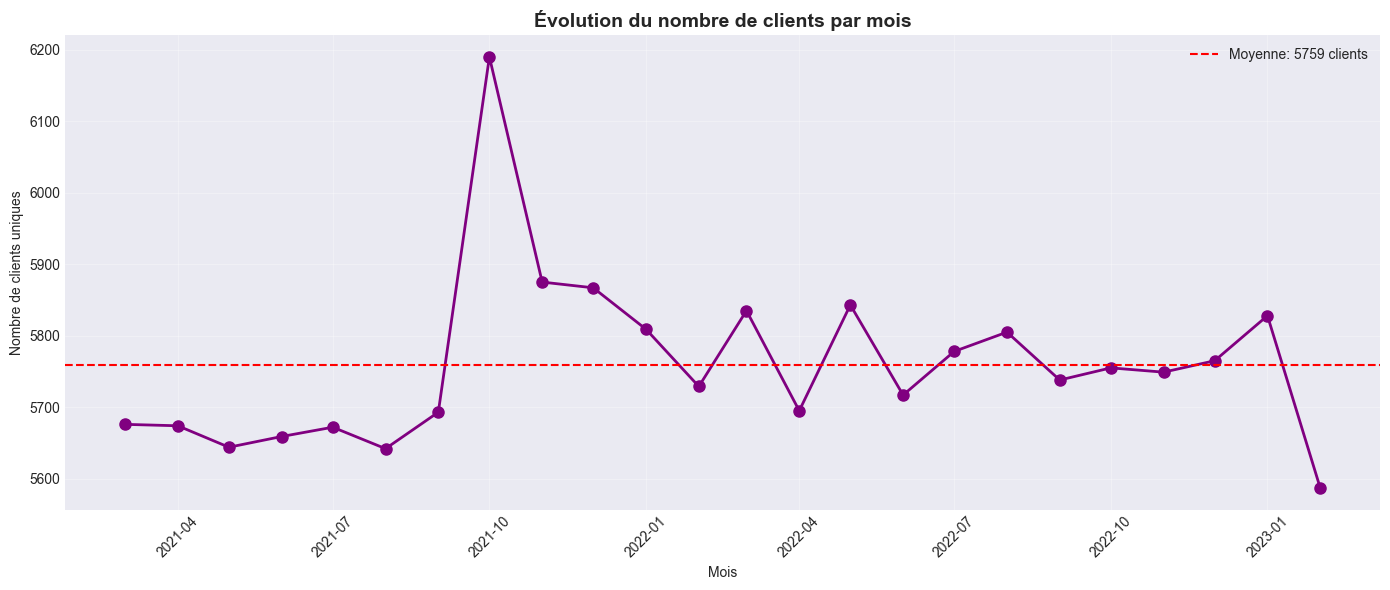

In [22]:
# Visualisation du nombre de clients par mois
plt.figure(figsize=(14, 6))
plt.plot(clients_par_mois['mois'].dt.to_timestamp(), clients_par_mois['nb_clients'], 
         marker='o', linewidth=2, markersize=8, color='purple')
plt.xlabel('Mois')
plt.ylabel('Nombre de clients uniques')
plt.title('Évolution du nombre de clients par mois', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.axhline(clients_par_mois['nb_clients'].mean(), color='red', linestyle='--', 
            label=f'Moyenne: {clients_par_mois["nb_clients"].mean():.0f} clients')
plt.legend()
plt.tight_layout()
plt.show()

### 4.5 Nombre de transactions

In [23]:
# Nombre de transactions par mois
transactions_par_mois = df_complete.groupby('mois').size().reset_index(name='nb_transactions')

print(" Nombre de transactions par mois :")
print(transactions_par_mois)

print(f"\n Nombre total de transactions : {len(df_complete)}")
print(f"Nombre moyen de transactions par mois : {transactions_par_mois['nb_transactions'].mean():.0f}")

 Nombre de transactions par mois :
       mois  nb_transactions
0   2021-03            28601
1   2021-04            28443
2   2021-05            28285
3   2021-06            26850
4   2021-07            24738
5   2021-08            25650
6   2021-09            33314
7   2021-10            30022
8   2021-11            28311
9   2021-12            32457
10  2022-01            29343
11  2022-02            29594
12  2022-03            29696
13  2022-04            27602
14  2022-05            29975
15  2022-06            28504
16  2022-07            28670
17  2022-08            28544
18  2022-09            28306
19  2022-10            28964
20  2022-11            28563
21  2022-12            28619
22  2023-01            28938
23  2023-02            25545

 Nombre total de transactions : 1048575
Nombre moyen de transactions par mois : 28647


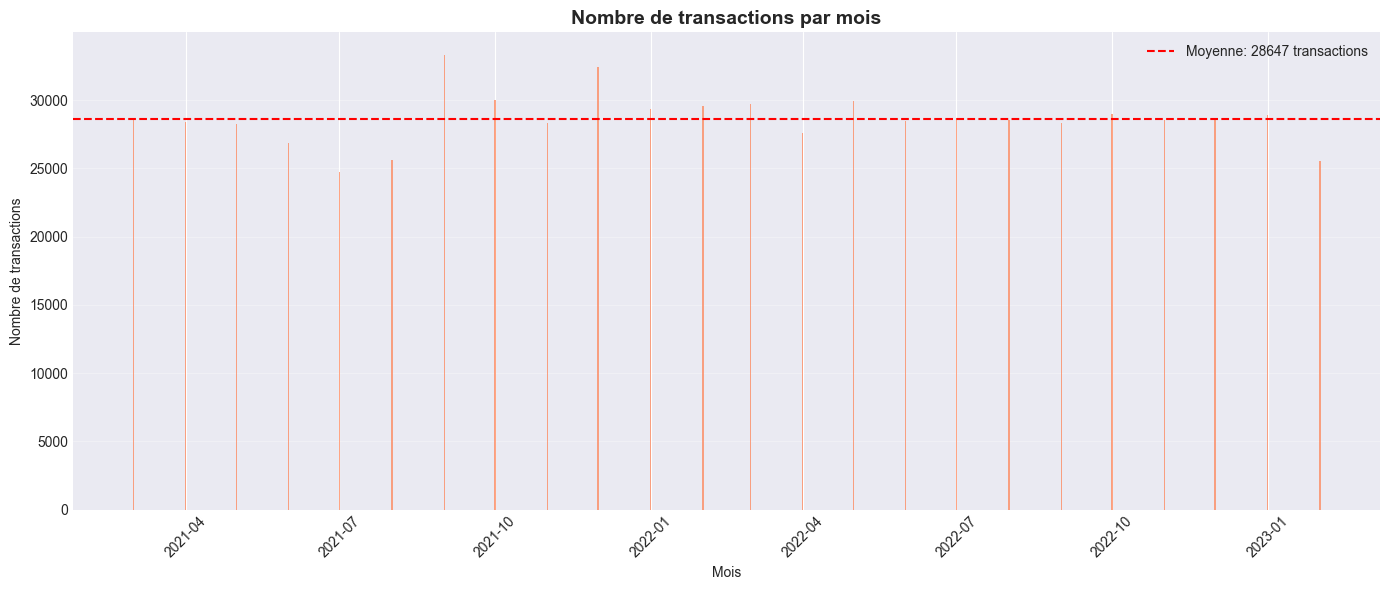

In [24]:
# Visualisation du nombre de transactions par mois
plt.figure(figsize=(14, 6))
plt.bar(transactions_par_mois['mois'].dt.to_timestamp(), transactions_par_mois['nb_transactions'], 
        color='coral', alpha=0.7)
plt.xlabel('Mois')
plt.ylabel('Nombre de transactions')
plt.title('Nombre de transactions par mois', fontsize=14, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.axhline(transactions_par_mois['nb_transactions'].mean(), color='red', linestyle='--', 
            label=f'Moyenne: {transactions_par_mois["nb_transactions"].mean():.0f} transactions')
plt.legend()
plt.tight_layout()
plt.show()

### 4.6 Nombre de produits vendus

In [ ]:
# Nombre de produits vendus par mois
produits_vendus_mois = df_complete.groupby('mois')['id_prod'].count().reset_index()
produits_vendus_mois.columns = ['mois', 'nb_produits_vendus']

# Nombre de produits uniques vendus par mois parce que c'est intéressant de voir si on vend toujours les mêmes produits ou si la variété change
produits_uniques_mois = df_complete.groupby('mois')['id_prod'].nunique().reset_index()
produits_uniques_mois.columns = ['mois', 'nb_produits_uniques']

# Fusion
produits_mois = produits_vendus_mois.merge(produits_uniques_mois, on='mois')

print(" Nombre de produits vendus par mois :")
print(produits_mois)

print(f"\n Total produits vendus : {df_complete['id_prod'].count()}")
print(f" Nombre de produits uniques vendus : {df_complete['id_prod'].nunique()}")

 Nombre de produits vendus par mois :
       mois  nb_produits_vendus  nb_produits_uniques
0   2021-03               28601                 2482
1   2021-04               28443                 2492
2   2021-05               28285                 2471
3   2021-06               26850                 2414
4   2021-07               24738                 2369
5   2021-08               25650                 2404
6   2021-09               33314                 2560
7   2021-10               30022                 2506
8   2021-11               28311                 2432
9   2021-12               32457                 2505
10  2022-01               29343                 2470
11  2022-02               29594                 2477
12  2022-03               29696                 2474
13  2022-04               27602                 2462
14  2022-05               29975                 2485
15  2022-06               28504                 2451
16  2022-07               28670                 2470
17  2022

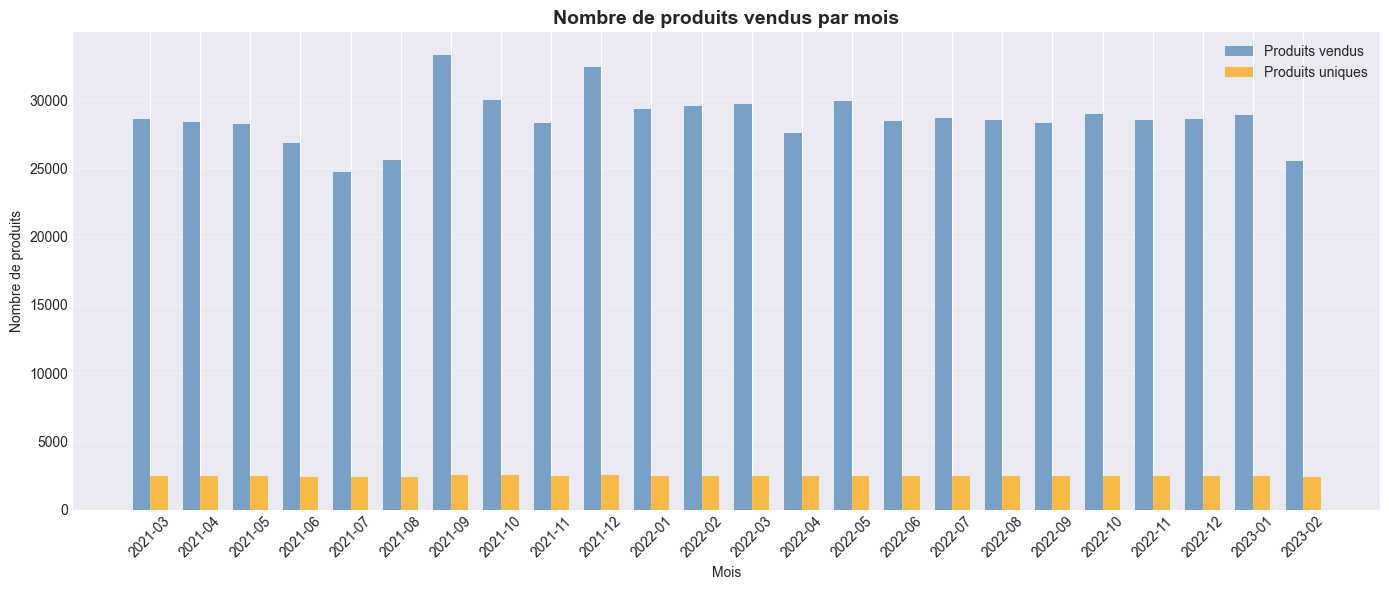

In [26]:
# Visualisation des produits vendus par mois
fig, ax = plt.subplots(figsize=(14, 6))

x = range(len(produits_mois))
width = 0.35

ax.bar([i - width/2 for i in x], produits_mois['nb_produits_vendus'], 
       width, label='Produits vendus', color='steelblue', alpha=0.7)
ax.bar([i + width/2 for i in x], produits_mois['nb_produits_uniques'], 
       width, label='Produits uniques', color='orange', alpha=0.7)

ax.set_xlabel('Mois')
ax.set_ylabel('Nombre de produits')
ax.set_title('Nombre de produits vendus par mois', fontsize=14, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(produits_mois['mois'], rotation=45)
ax.legend()
ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 5. Analyse des produits : Tops et Flops

### 5.1 Top produits (best-sellers)

In [45]:
# Analyse par produit
produits_stats = df_complete.groupby('id_prod').agg({
    'ca': 'sum',
    'client_id': 'count',
    'price': 'first',
    'categ': 'first'
}).reset_index()

produits_stats.columns = ['id_prod', 'ca_total', 'nb_ventes', 'prix', 'categorie']

# Top 10 produits par CA
top_10_ca = produits_stats.nlargest(10, 'ca_total')

print(" TOP 10 produits par chiffre d'affaires :")
print(top_10_ca)

# Top 10 produits par nombre de ventes
top_10_ventes = produits_stats.nlargest(10, 'nb_ventes')

print("\n TOP 10 produits par nombre de ventes :")
print(top_10_ventes)


 TOP 10 produits par chiffre d'affaires :
     id_prod  ca_total  nb_ventes    prix  categorie
3096   2_159  94893.50        650  145.99        2.0
3070   2_135  69334.95       1005   68.99        2.0
3045   2_112  65407.76        968   67.57        2.0
3034   2_102  60736.78       1027   59.14        2.0
3152   2_209  56971.86        814   69.99        2.0
2619   1_395  56617.47       1953   28.99        1.0
2591   1_369  56136.60       2340   23.99        1.0
3043   2_110  53846.25        865   62.25        2.0
2607   1_383  53834.43       1857   28.99        1.0
2641   1_414  53522.18       2246   23.83        1.0

 TOP 10 produits par nombre de ventes :
     id_prod  ca_total  nb_ventes   prix  categorie
2591   1_369  56136.60       2340  23.99        1.0
2644   1_417  47626.31       2269  20.99        1.0
2641   1_414  53522.18       2246  23.83        1.0
2733   1_498  51460.74       2202  23.37        1.0
2653   1_425  36749.37       2163  16.99        1.0
2629   1_403  36699.60

In [ ]:
# Détection et suppression des transactions sans produit valide
print('Vérification des transactions sans info produit :')

# Lignes avec prix ou catégorie manquants
mask_missing_info = df_complete['price'].isnull() | df_complete['categ'].isnull()
missing_counts = df_complete[mask_missing_info]['id_prod'].value_counts()
print('\nExemples d\'id_prod avec infos manquantes :')
print(missing_counts.head(10))

# IDs présents dans transactions mais pas dans le catalogue products
ids_not_in_catalog = set(df_complete['id_prod'].dropna().unique()) - set(df_products['id_prod'].dropna().unique())
print(f"\nIDs non présents dans le catalogue : {len(ids_not_in_catalog)} (exemples: {list(ids_not_in_catalog)[:10]})")

# Lignes à supprimer : soit info manquante soit id not in catalog parce que ça veut dire qu'on n'a pas d'info sur le produit, donc on ne peut pas faire d'analyse fiable dessus. et not in cataglog veut dire que ce n'est pas dans le dataset produits, donc on n'a aucune info dessus, donc on ne peut pas faire d'analyse fiable dessus non plus.
mask_remove = mask_missing_info | df_complete['id_prod'].isin(ids_not_in_catalog)

print(f"\nLignes à supprimer : {mask_remove.sum()} / {len(df_complete)}")
print('Aperçu des premières lignes problématiques :')
print(df_complete[mask_remove].head(10))

# Nettoyage
df_clean = df_complete[~mask_remove].copy()
print(f"\n Nettoyage : {len(df_complete) - len(df_clean)} lignes supprimées. Nouvelle taille: {len(df_clean)}")

# Recalcul des statistiques par produit sur df_clean
produits_stats_clean = df_clean.groupby('id_prod').agg({
    'ca': 'sum',
    'client_id': 'count',
    'price': 'first',
    'categ': 'first'
}).reset_index()
produits_stats_clean.columns = ['id_prod', 'ca_total', 'nb_ventes', 'prix', 'categorie']

# Top 10 avant / après parce que c'est intéressant de voir l'impact du nettoyage sur les produits les plus vendus
print('\nTOP 10 produits par nombre de ventes - AVANT (éventuels éléments erronés) :')
print(top_10_ventes[['id_prod', 'ca_total', 'nb_ventes', 'prix', 'categorie']].head(10))

top_10_ventes_clean = produits_stats_clean.nlargest(10, 'nb_ventes')
print('\nTOP 10 produits par nombre de ventes - APRÈS nettoyage :')
print(top_10_ventes_clean)

# Mettre à jour les variables principales pratique pour suites d'analyse)
df_complete = df_clean
produits_stats = produits_stats_clean
top_10_ventes = top_10_ventes_clean

print('\n Variables mises à jour : df_complete, produits_stats, top_10_ventes')

Vérification des transactions sans info produit :

Exemples d'id_prod avec infos manquantes :
Series([], Name: count, dtype: int64)

IDs non présents dans le catalogue : 0 (exemples: [])

Lignes à supprimer : 0 / 687534
Aperçu des premières lignes problématiques :
Empty DataFrame
Columns: [id_prod, date, session_id, client_id, price, categ, sex, birth, age, ca, est_btob, semaine, mois]
Index: []

 Nettoyage : 0 lignes supprimées. Nouvelle taille: 687534

TOP 10 produits par nombre de ventes - AVANT (éventuels éléments erronés) :
     id_prod  ca_total  nb_ventes   prix  categorie
2591   1_369  56136.60       2340  23.99        1.0
2644   1_417  47626.31       2269  20.99        1.0
2641   1_414  53522.18       2246  23.83        1.0
2733   1_498  51460.74       2202  23.37        1.0
2653   1_425  36749.37       2163  16.99        1.0
2629   1_403  36699.60       2040  17.99        1.0
2640   1_413  36627.64       2036  17.99        1.0
2639   1_412  33533.10       2014  16.65        1

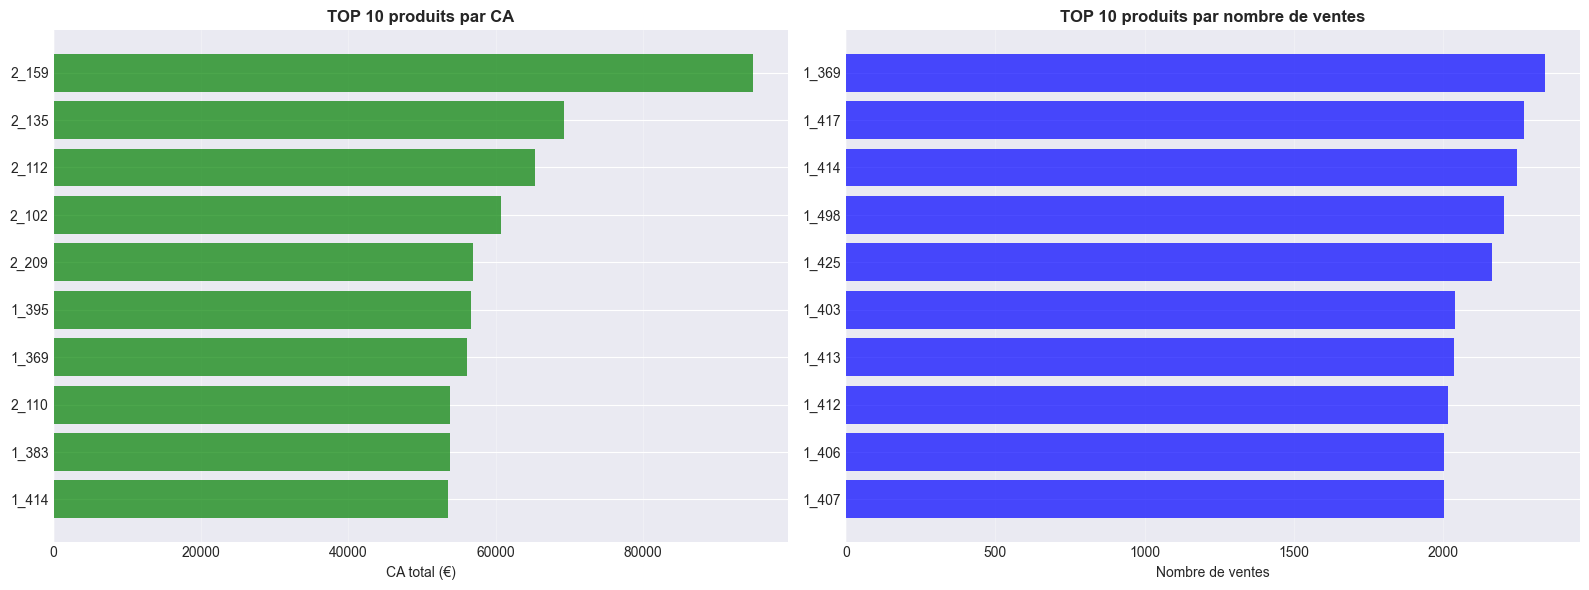

In [29]:
# Visualisation du Top 10 par CA
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Top 10 CA
axes[0].barh(range(len(top_10_ca)), top_10_ca['ca_total'], color='green', alpha=0.7)
axes[0].set_yticks(range(len(top_10_ca)))
axes[0].set_yticklabels(top_10_ca['id_prod'])
axes[0].set_xlabel('CA total (€)')
axes[0].set_title('TOP 10 produits par CA', fontsize=12, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(True, alpha=0.3, axis='x')

# Top 10 ventes
axes[1].barh(range(len(top_10_ventes)), top_10_ventes['nb_ventes'], color='blue', alpha=0.7)
axes[1].set_yticks(range(len(top_10_ventes)))
axes[1].set_yticklabels(top_10_ventes['id_prod'])
axes[1].set_xlabel('Nombre de ventes')
axes[1].set_title('TOP 10 produits par nombre de ventes', fontsize=12, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.show()

### 5.2 Flop produits (moins vendus)

In [30]:
# Flop 10 produits par nombre de ventes
flop_10_ventes = produits_stats.nsmallest(10, 'nb_ventes')

print(" FLOP 10 produits par nombre de ventes :")
print(flop_10_ventes)

# Produits jamais vendus (si applicable)
produits_tous = set(df_products['id_prod'])
produits_vendus = set(df_complete['id_prod'])
produits_non_vendus = produits_tous - produits_vendus

print(f"\n Nombre de produits jamais vendus : {len(produits_non_vendus)}")
if len(produits_non_vendus) > 0:
    print(f"   Exemples : {list(produits_non_vendus)[:10]}")

 FLOP 10 produits par nombre de ventes :
     id_prod  ca_total  nb_ventes   prix  categorie
166   0_1151      2.99          1   2.99        0.0
313   0_1284      1.38          1   1.38        0.0
417   0_1379      2.99          1   2.99        0.0
549   0_1498      2.48          1   2.48        0.0
595   0_1539      0.99          1   0.99        0.0
665   0_1601      1.99          1   1.99        0.0
698   0_1633     24.99          1  24.99        0.0
752   0_1683      2.99          1   2.99        0.0
802   0_1728      2.27          1   2.27        0.0
1327  0_2201     20.99          1  20.99        0.0

 Nombre de produits jamais vendus : 21
   Exemples : ['0_1016', '0_1620', '0_310', '0_1062', '0_510', '2_87', '0_1025', '0_1645', '0_1318', '0_1014']


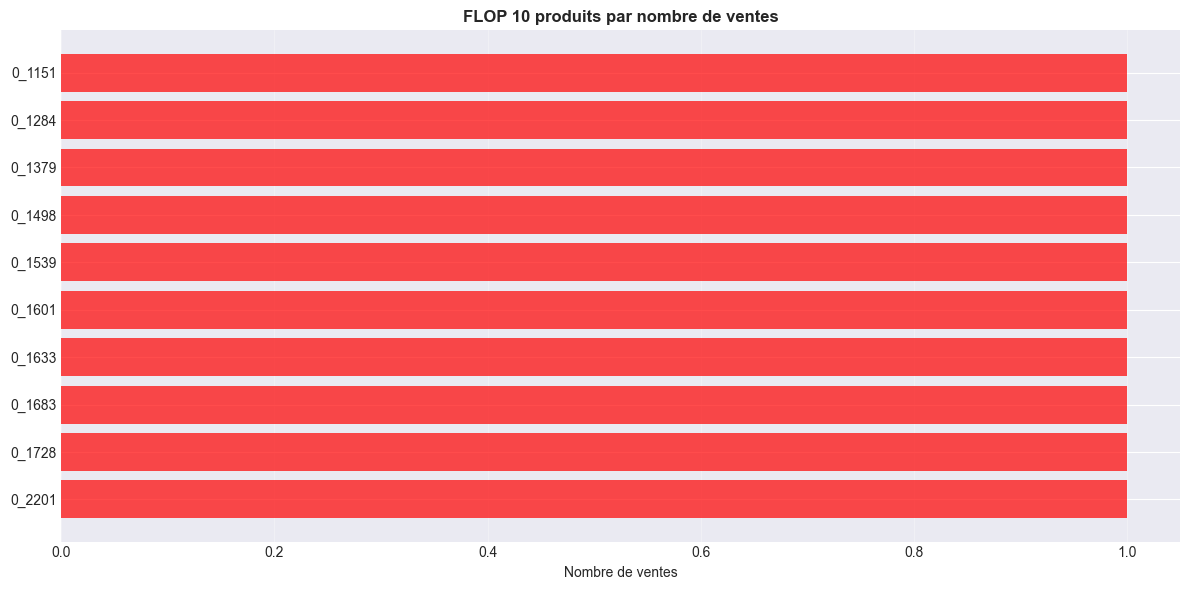

In [31]:
# Visualisation du Flop 10
plt.figure(figsize=(12, 6))
plt.barh(range(len(flop_10_ventes)), flop_10_ventes['nb_ventes'], color='red', alpha=0.7)
plt.yticks(range(len(flop_10_ventes)), flop_10_ventes['id_prod'])
plt.xlabel('Nombre de ventes')
plt.title('FLOP 10 produits par nombre de ventes', fontsize=12, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

### 5.3 Répartition des produits par catégorie

In [32]:
# Nombre de produits par catégorie
produits_par_cat = df_products.groupby('categ').size().reset_index(name='nb_produits')

print(" Nombre de produits par catégorie (catalogue) :")
print(produits_par_cat)

# Prix moyen par catégorie
prix_moyen_cat = df_products.groupby('categ')['price'].mean().reset_index()
prix_moyen_cat.columns = ['categorie', 'prix_moyen']

print("\n Prix moyen par catégorie :")
print(prix_moyen_cat)

 Nombre de produits par catégorie (catalogue) :
   categ  nb_produits
0      0         2308
1      1          739
2      2          239

 Prix moyen par catégorie :
   categorie  prix_moyen
0          0   11.732795
1          1   25.531421
2          2  108.354686


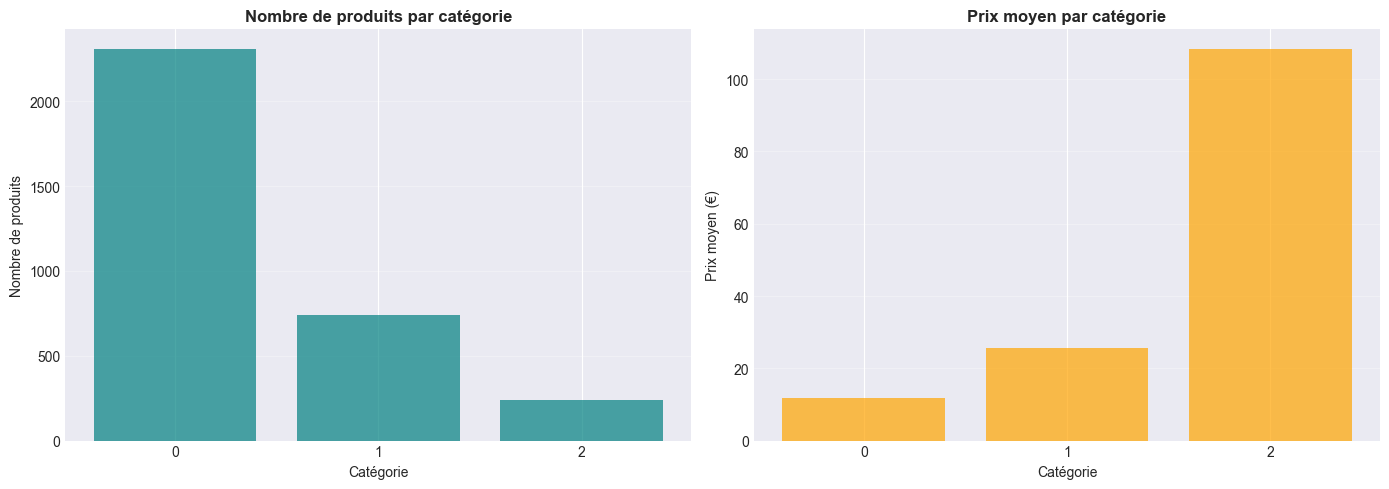

In [33]:
# Visualisation de la répartition par catégorie
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Nombre de produits par catégorie
axes[0].bar(produits_par_cat['categ'].astype(str), produits_par_cat['nb_produits'], 
            color='teal', alpha=0.7)
axes[0].set_xlabel('Catégorie')
axes[0].set_ylabel('Nombre de produits')
axes[0].set_title('Nombre de produits par catégorie', fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')

# Prix moyen par catégorie
axes[1].bar(prix_moyen_cat['categorie'].astype(str), prix_moyen_cat['prix_moyen'], 
            color='orange', alpha=0.7)
axes[1].set_xlabel('Catégorie')
axes[1].set_ylabel('Prix moyen (€)')
axes[1].set_title('Prix moyen par catégorie', fontsize=12, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 6. Analyse des clients

### 6.1 Répartition du CA pour les clients BtoB

In [34]:
# CA BtoB vs BtoC
ca_btob = df_complete[df_complete['est_btob']]['ca'].sum()
ca_btoc = df_complete[~df_complete['est_btob']]['ca'].sum()
ca_total = df_complete['ca'].sum()

print(" Répartition du CA BtoB vs BtoC :")
print(f"   - CA BtoB : {ca_btob:.2f}€ ({ca_btob/ca_total*100:.2f}%)")
print(f"   - CA BtoC : {ca_btoc:.2f}€ ({ca_btoc/ca_total*100:.2f}%)")
print(f"   - CA Total : {ca_total:.2f}€")

print(f"\n Nombre de clients :")
print(f"   - Clients BtoB : {len(btob_ids)} ({len(btob_ids)/len(client_stats)*100:.2f}%)")
print(f"   - Clients BtoC : {len(client_stats) - len(btob_ids)} ({(len(client_stats) - len(btob_ids))/len(client_stats)*100:.2f}%)")

 Répartition du CA BtoB vs BtoC :
   - CA BtoB : 884296.09€ (7.35%)
   - CA BtoC : 11143367.01€ (92.65%)
   - CA Total : 12027663.10€

 Nombre de clients :
   - Clients BtoB : 4 (0.05%)
   - Clients BtoC : 8597 (99.95%)


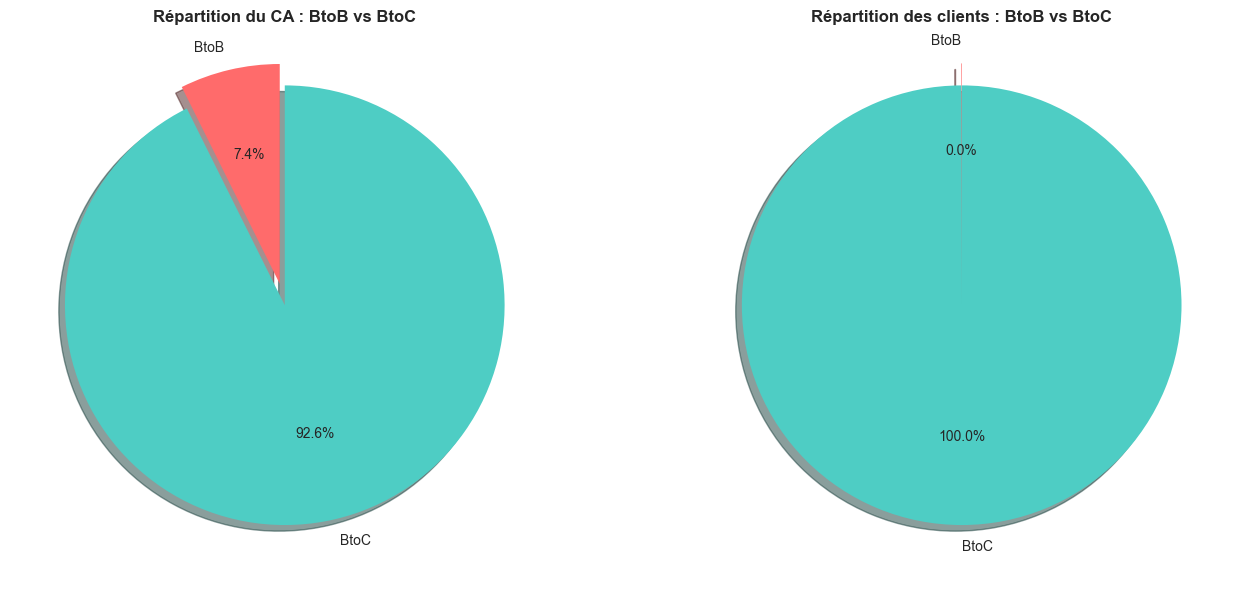

In [35]:
# Visualisation de la répartition BtoB vs BtoC
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# CA BtoB vs BtoC
labels = ['BtoB', 'BtoC']
sizes = [ca_btob, ca_btoc]
colors = ['#FF6B6B', '#4ECDC4']
explode = (0.1, 0)

axes[0].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
            shadow=True, startangle=90)
axes[0].set_title('Répartition du CA : BtoB vs BtoC', fontsize=12, fontweight='bold')

# Nombre de clients BtoB vs BtoC
nb_clients = [len(btob_ids), len(client_stats) - len(btob_ids)]
axes[1].pie(nb_clients, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
            shadow=True, startangle=90)
axes[1].set_title('Répartition des clients : BtoB vs BtoC', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

### 6.2 Courbe de Lorenz

La courbe de Lorenz permet de visualiser la concentration du chiffre d'affaires.
Elle montre quelle proportion du CA est générée par quelle proportion des clients.

In [50]:
# Préparation des données pour la courbe de Lorenz
# On utilise client_stats qui contient le CA par client
lorenz_data = client_stats[['client_id', 'ca_total']].copy()

# Trier par CA croissant
lorenz_data = lorenz_data.sort_values('ca_total').reset_index(drop=True)

# Calculer les proportions cumulées
lorenz_data['ca_cumule'] = lorenz_data['ca_total'].cumsum()
lorenz_data['ca_cumule_pct'] = lorenz_data['ca_cumule'] / lorenz_data['ca_total'].sum()
lorenz_data['clients_cumule_pct'] = (lorenz_data.index + 1) / len(lorenz_data)

# Calcul du coefficient de Gini
# Le coefficient de Gini mesure l'inégalité de la distribution (0 = égalité parfaite, 1 = inégalité maximale)
area_under_lorenz = np.trapezoid(lorenz_data['ca_cumule_pct'], lorenz_data['clients_cumule_pct'])
gini_coefficient = 1 - 2 * area_under_lorenz

print(" Courbe de Lorenz - Concentration du CA :")
print(f"   - Coefficient de Gini : {gini_coefficient:.4f}")
print(f"   - Interprétation : {'Forte concentration' if gini_coefficient > 0.5 else 'Concentration modérée'}")

# Quelques statistiques clés
print(f"\n Règle 80/20 (Pareto) :")
# Trouver le pourcentage de clients qui génèrent 80% du CA
idx_80 = lorenz_data[lorenz_data['ca_cumule_pct'] >= 0.8].index[0]
pct_clients_80 = (idx_80 + 1) / len(lorenz_data) * 100
print(f"   - {100 - pct_clients_80:.1f}% des clients génèrent 80% du CA")
print(f"   - {pct_clients_80:.1f}% des clients génèrent 20% du CA")

 Courbe de Lorenz - Concentration du CA :
   - Coefficient de Gini : 0.4420
   - Interprétation : Concentration modérée

 Règle 80/20 (Pareto) :
   - 4.6% des clients génèrent 80% du CA
   - 95.4% des clients génèrent 20% du CA


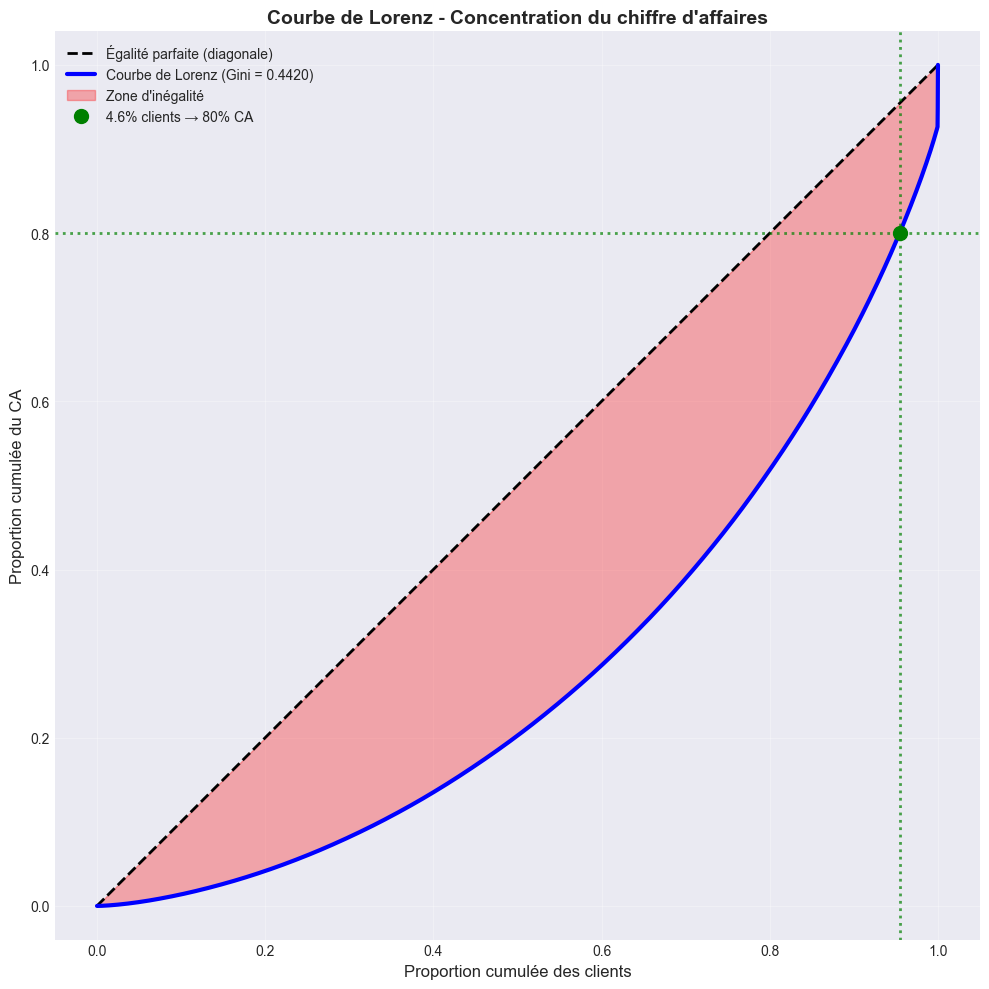

In [37]:
# Visualisation de la courbe de Lorenz
plt.figure(figsize=(10, 10))

# Ligne d'égalité parfaite (diagonale)
plt.plot([0, 1], [0, 1], 'k--', linewidth=2, label='Égalité parfaite (diagonale)')

# Courbe de Lorenz
plt.plot(lorenz_data['clients_cumule_pct'], lorenz_data['ca_cumule_pct'], 
         linewidth=3, color='blue', label=f'Courbe de Lorenz (Gini = {gini_coefficient:.4f})')

# Zone entre la courbe et la diagonale
plt.fill_between(lorenz_data['clients_cumule_pct'], 
                  lorenz_data['ca_cumule_pct'], 
                  lorenz_data['clients_cumule_pct'],
                  alpha=0.3, color='red', label='Zone d\'inégalité')

# Ligne 80/20
plt.axhline(y=0.8, color='green', linestyle=':', linewidth=2, alpha=0.7)
plt.axvline(x=(idx_80 + 1) / len(lorenz_data), color='green', linestyle=':', linewidth=2, alpha=0.7)
plt.plot((idx_80 + 1) / len(lorenz_data), 0.8, 'go', markersize=10, 
         label=f'{100 - pct_clients_80:.1f}% clients → 80% CA')

plt.xlabel('Proportion cumulée des clients', fontsize=12)
plt.ylabel('Proportion cumulée du CA', fontsize=12)
plt.title('Courbe de Lorenz - Concentration du chiffre d\'affaires', 
          fontsize=14, fontweight='bold')
plt.legend(loc='upper left', fontsize=10)
plt.grid(True, alpha=0.3)
plt.axis('equal')

plt.tight_layout()
plt.show()

### 6.3 Profils clients - Analyses complémentaires

In [38]:
# Distribution du sexe des clients
sexe_distribution = df_customers['sex'].value_counts()

print("Répartition par sexe :")
print(sexe_distribution)
print(f"\nPourcentages :")
print(sexe_distribution / len(df_customers) * 100)

# Distribution de l'âge
print("\n Statistiques d'âge des clients :")
print(df_customers['age'].describe())

Répartition par sexe :
sex
f    4490
m    4131
Name: count, dtype: int64

Pourcentages :
sex
f    52.082125
m    47.917875
Name: count, dtype: float64

 Statistiques d'âge des clients :
count    8621.000000
mean       45.724394
std        16.917958
min        20.000000
25%        32.000000
50%        45.000000
75%        58.000000
max        95.000000
Name: age, dtype: float64


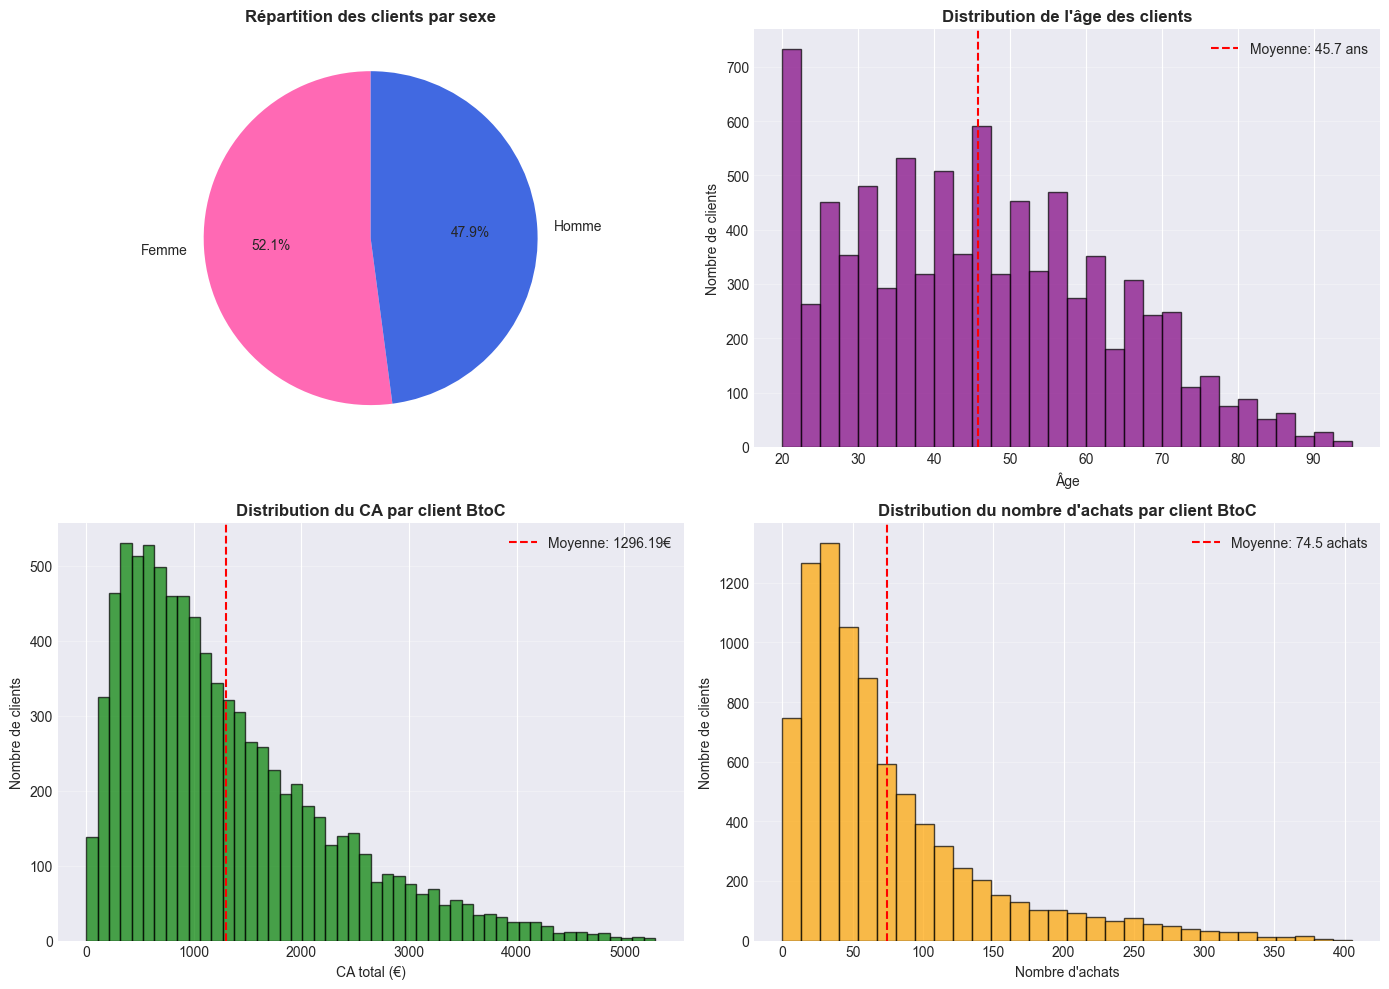

In [39]:
# Visualisations des profils clients
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Répartition par sexe
axes[0, 0].pie(sexe_distribution, labels=['Femme', 'Homme'] if sexe_distribution.index[0] == 'f' else ['Homme', 'Femme'],
               autopct='%1.1f%%', colors=['#FF69B4', '#4169E1'], startangle=90)
axes[0, 0].set_title('Répartition des clients par sexe', fontweight='bold')

# Distribution de l'âge
axes[0, 1].hist(df_customers['age'], bins=30, edgecolor='black', alpha=0.7, color='purple')
axes[0, 1].set_xlabel('Âge')
axes[0, 1].set_ylabel('Nombre de clients')
axes[0, 1].set_title('Distribution de l\'âge des clients', fontweight='bold')
axes[0, 1].axvline(df_customers['age'].mean(), color='red', linestyle='--', 
                   label=f'Moyenne: {df_customers["age"].mean():.1f} ans')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3, axis='y')

# Distribution du CA par client (sans BtoB)
ca_btoc_only = client_stats[~client_stats['est_btob']]['ca_total']
axes[1, 0].hist(ca_btoc_only, bins=50, edgecolor='black', alpha=0.7, color='green')
axes[1, 0].set_xlabel('CA total (€)')
axes[1, 0].set_ylabel('Nombre de clients')
axes[1, 0].set_title('Distribution du CA par client BtoC', fontweight='bold')
axes[1, 0].axvline(ca_btoc_only.mean(), color='red', linestyle='--', 
                   label=f'Moyenne: {ca_btoc_only.mean():.2f}€')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Distribution du nombre d'achats par client (sans BtoB)
achats_btoc_only = client_stats[~client_stats['est_btob']]['nb_achats']
axes[1, 1].hist(achats_btoc_only, bins=30, edgecolor='black', alpha=0.7, color='orange')
axes[1, 1].set_xlabel('Nombre d\'achats')
axes[1, 1].set_ylabel('Nombre de clients')
axes[1, 1].set_title('Distribution du nombre d\'achats par client BtoC', fontweight='bold')
axes[1, 1].axvline(achats_btoc_only.mean(), color='red', linestyle='--', 
                   label=f'Moyenne: {achats_btoc_only.mean():.1f} achats')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 7. Tableau de bord récapitulatif

### KPIs clés de la librairie

In [51]:
# Calcul des KPIs
kpis = {
    'CA Total': f"{df_complete['ca'].sum():.2f}€",
    'CA Moyen/Jour': f"{ca_journalier['ca'].mean():.2f}€",
    'CA Moyen/Mois': f"{ca_mensuel['ca'].mean():.2f}€",
    'Nombre Total de Clients': len(client_stats),
    'Clients BtoB': len(btob_ids),
    'Clients BtoC': len(client_stats) - len(btob_ids),
    'Nombre Total de Transactions': len(df_complete),
    'Nombre de Produits Uniques Vendus': df_complete['id_prod'].nunique(),
    'Panier Moyen': f"{client_stats['panier_moyen'].mean():.2f}€",
    'CA Moyen par Client': f"{client_stats['ca_total'].mean():.2f}€",
    'Achats Moyens par Client': f"{client_stats['nb_achats'].mean():.1f}",
    'Coefficient de Gini': f"{gini_coefficient:.4f}"
}

print("="*60)
print(" TABLEAU DE BORD - INDICATEURS CLÉS DE PERFORMANCE (KPI)")
print("="*60)
for key, value in kpis.items():
    print(f"{key:40s} : {value}")


 TABLEAU DE BORD - INDICATEURS CLÉS DE PERFORMANCE (KPI)
CA Total                                 : 12027663.10€
CA Moyen/Jour                            : 16476.25€
CA Moyen/Mois                            : 501152.63€
Nombre Total de Clients                  : 8601
Clients BtoB                             : 4
Clients BtoC                             : 8597
Nombre Total de Transactions             : 687534
Nombre de Produits Uniques Vendus        : 3265
Panier Moyen                             : 21.93€
CA Moyen par Client                      : 1398.40€
Achats Moyens par Client                 : 79.9
Coefficient de Gini                      : 0.4420


## 8. Export des datasets pour analyses statistiques

Export des données nettoyées pour le second notebook (tests statistiques)

In [41]:
# Export du dataset complet (avec BtoB)
df_complete.to_csv('data_complete_avec_btob.csv', index=False, sep=';')
print(" Dataset complet exporté : data_complete_avec_btob.csv")

# Export du dataset sans BtoB (pour les tests statistiques)
df_sans_btob = df_complete[~df_complete['est_btob']].copy()
df_sans_btob.to_csv('data_sans_btob.csv', index=False, sep=';')
print(" Dataset sans BtoB exporté : data_sans_btob.csv")

# Export des statistiques clients
client_stats.to_csv('client_stats.csv', index=False, sep=';')
print(" Statistiques clients exportées : client_stats.csv")

# Export de la liste des clients BtoB
pd.DataFrame({'client_id': btob_ids}).to_csv('clients_btob.csv', index=False)
print(" Liste des clients BtoB exportée : clients_btob.csv")

print(f"\n Nombre de lignes dans le dataset sans BtoB : {len(df_sans_btob)}")
print(f" Nombre de clients BtoC : {df_sans_btob['client_id'].nunique()}")

 Dataset complet exporté : data_complete_avec_btob.csv
 Dataset sans BtoB exporté : data_sans_btob.csv
 Statistiques clients exportées : client_stats.csv
 Liste des clients BtoB exportée : clients_btob.csv

 Nombre de lignes dans le dataset sans BtoB : 640734
 Nombre de clients BtoC : 8596


## 9. Conclusions de l'analyse

### Points clés identifiés :

1. **Chiffre d'affaires** :
   - Évolution stable/croissante sur la période analysée
   - Tendances identifiées grâce aux moyennes mobiles
   - Répartition par catégorie analysée

2. **Clients BtoB** :
   - 4 clients BtoB identifiés
   - Contribution significative au CA total
   - Comportement d'achat distinct des clients BtoC

3. **Concentration du CA** :
   - Courbe de Lorenz calculée
   - Coefficient de Gini déterminé
   - Confirmation/infirmation de la règle 80/20

4. **Produits** :
   - Top performers identifiés
   - Produits peu performants analysés
   - Répartition par catégorie étudiée

### Prochaines étapes :
- Notebook 2 : Tests statistiques sur les corrélations (sans clients BtoB)
-  Support de présentation avec synthèse des résultats